In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
from math import exp
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from random import seed
from random import randrange

In [52]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50000,n_features=5,n_classes=5,n_informative=5,n_redundant=0)
X

array([[ 0.96085969, -0.79887209,  0.73737978, -0.0679884 ,  0.76774768],
       [ 1.42942011,  3.03828761, -4.216711  ,  2.76233122,  4.82721085],
       [ 2.21711616, -1.11956489,  0.68742838, -0.5883952 ,  1.05247684],
       ...,
       [-0.23929602,  1.57331554,  1.41790456,  0.21371832,  1.94922655],
       [-2.29454753,  1.92160189, -0.11266662, -3.39583642,  1.30115415],
       [ 3.64924945, -0.17204378,  3.23644727,  0.97525046,  0.35254967]])

d:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<Figure size 432x288 with 0 Axes>

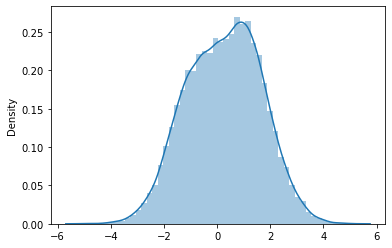

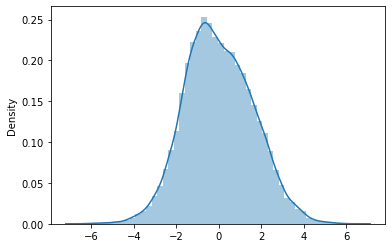

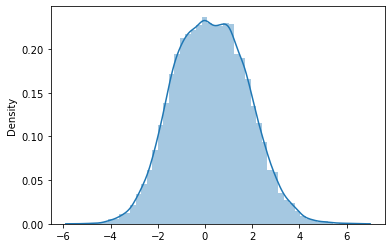

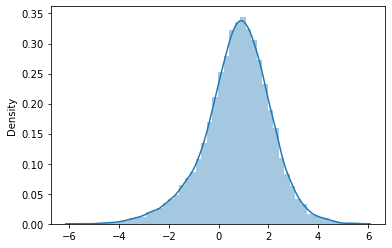

<Figure size 432x288 with 0 Axes>

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(X[:,0])
plt.figure()
ax_1=sns.distplot(X[:,1])
plt.figure()
ax_2=sns.distplot(X[:,2])
plt.figure()
ax_3=sns.distplot(X[:,3])
plt.figure()

In [53]:
X=pd.DataFrame(X)
Y=pd.DataFrame(y)
X['Result']=Y
X=np.array(X)
X.shape

(50000, 6)

In [56]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
            
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)

# Input Neural Net parameters
#def NN_params():
    #total_hidden_layers = int(input("Please enter the number of hidden layers in neural network (1 or 2): "))
    #l_rate = float(input("Please enter the learning rate: ")) 
    #n_inputs = int(input("Please enter the number of input layer neurons: "))
    #n_outputs = int(input("Please enter the number of output layer neurons: ")) 
    #n_epoch = int(input("Please enter the number of epochs: "))
    #n_folds = int(input("Please enter the number of folds: "))
    #if  total_hidden_layers==2:
    #    n_hidden = int(input("Please enter the number of neurons in first hidden layer: "))
    #    n_hidden2 = int(input("Please enter the number of neurons in second hidden layer: "))
    #else:
    #    n_hidden = int(input("Please enter the number neurons in first hidden layer: "))
    #func=str(input("Input the activation function for eg relu or tanh: "))
    #    
    #return func

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs, *args):
    if total_hidden_layers == 2:
        network = list()
        hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
        network.append(hidden_layer)
        hidden_layer2 = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_hidden2)]
        network.append(hidden_layer2)
        output_layer = [{'weights':[random() for i in range(n_hidden2 + 1)]} for i in range(n_outputs)]
        network.append(output_layer)
        return network
    elif total_hidden_layers == 1:
        network = list()
        hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
        network.append(hidden_layer)
        output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
        network.append(output_layer)
        return network
    else:
        print('Enter number of layer - Min 1 and Max 2')

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, *args):
    #train, test, l_rate, n_epoch, n_hidden
    #if total_hidden_layers == 2:
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs, *args)
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(predictions)

# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'seeds_dataset.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
# Input Neural Net parameters
#n_folds = 5
#l_rate = 0.3
#n_epoch = 500
#n_hidden = 5
n_inputs = int(input("Please enter the number of input layer neurons: "))
n_outputs = int(input("Please enter the number of output layer neurons: ")) 
n_epoch = int(input("Please enter the number of epochs: "))
n_folds = int(input("Please enter the number of folds: "))
rate = float(input("Please enter the learning rate: ")) 

total_hidden_layers = int(input("Please enter the number of hidden layers in neural network (1 or 2): "))
if total_hidden_layers==2:
    n_hidden = int(input("Please enter the number of neurons in first hidden layer: "))
    n_hidden2 = int(input("Please enter the number of neurons in second hidden layer: "))
elif total_hidden_layers == 1:
    n_hidden = int(input("Please enter the number neurons in first hidden layer: "))
else:
    print('Enter number of layer - Min 1 and Max 2')
func=str(input("Input the activation function for eg relu or tanh: "))
#NN_params()
if total_hidden_layers==2:
    scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden, n_hidden2)
elif total_hidden_layers == 1:
    scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
else:
    print('Enter number of layer - Min 1 and Max 2')

    
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Please enter the number of input layer neurons: 2
Please enter the number of output layer neurons: 2
Please enter the number of epochs: 500
Please enter the number of folds: 5
Please enter the learning rate: 0.4
Please enter the number of hidden layers in neural network (1 or 2): 2
Please enter the number of neurons in first hidden layer: 4
Please enter the number of neurons in second hidden layer: 4
Input the activation function for eg relu or tanh: tanh
Scores: [95.23809523809523, 90.47619047619048, 97.61904761904762, 92.85714285714286, 88.09523809523809]
Mean Accuracy: 92.857%
